# scaling

In [ ]:
# 요약
# 데이터 encoding 완료 후 진행해야 함
# 스케일링 4가지 중 어떤 것 사용할지 고민해보기 -> 스케일링 4가지 모두 모델에 학습시켜서 성능이 가장 좋은 것 적용

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

In [2]:
# 데이터 지은언니 0615버전 데이터 (데이터 encoding 완료 후 진행해야 함)

train = pd.read_csv('../../ieee-fraud-detection/0615_train_pp_ver1.csv')
test =pd.read_csv('../../ieee-fraud-detection/0615_test_pp_ver1.csv')

In [3]:
class MultiColLabelEncoder:
    def __init__(self):
        self.encoder_dict = defaultdict(LabelEncoder)

    def fit_transform(self, X: pd.DataFrame, columns: list):  # 컬럼명 리스트 기준으로 레이블인코딩
        if not isinstance(columns, list):
            columns = [columns]

        output = X.copy()
        output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].fit_transform(x))

        return output

    def inverse_transform(self, X: pd.DataFrame, columns: list):  # 인코딩 된 열 레이블 복구
        if not isinstance(columns, list):
            columns = [columns]

        if not all(key in self.encoder_dict for key in columns):
            raise KeyError(f'At least one of {columns} is not encoded before')

        output = X.copy()
        try:
            output[columns] = X[columns].apply(lambda x: self.encoder_dict[x.name].inverse_transform(x))
        except ValueError:
            print(f'Need assignment when do "fit_transform" function')
            raise

        return output

In [4]:
# encoding
cat_cols = ["ProductCD", "card1", "card2", "card3", "card4", "card5", "card6", "addr1", "addr2", "P_emaildomain", 
            "R_emaildomain", "M1", "M2", "M3", "M4", "M5", "M6", "M7", "M8", "M9"]
train_encoded = MultiColLabelEncoder().fit_transform(train, columns=cat_cols)
train_encoded

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,M3,M4,M5,M6,M7,M8,M9,PC1,PC2,PC3
0,2987000,0.0,86400,68.50,4,10095,500,42,1,38,...,1,2,0,1,2,2,2,-414.605554,-99.819259,100.066514
1,2987001,0.0,86401,29.00,4,1372,303,42,2,2,...,2,0,1,1,2,2,2,-581.849403,-115.593458,-18.591293
2,2987002,0.0,86469,59.00,4,2833,389,42,3,58,...,1,0,0,0,0,0,0,-581.849421,-115.593437,-18.591291
3,2987003,0.0,86499,50.00,4,13341,466,42,2,14,...,2,0,1,0,2,2,2,2675.079606,77.806453,998.550570
4,2987004,0.0,86506,50.00,1,2712,413,42,2,2,...,2,3,2,2,2,2,2,-581.849185,-115.593577,-18.591272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0.0,15811047,49.00,4,4305,500,42,3,108,...,1,0,1,0,0,0,1,-543.343239,-96.650015,-2.084821
590536,3577536,0.0,15811049,39.50,4,7354,124,42,2,106,...,0,0,0,1,0,0,0,-581.849421,-115.593437,-18.591291
590537,3577537,0.0,15811079,30.95,4,8621,494,42,2,106,...,0,3,2,1,2,2,2,-581.849441,-115.593445,-18.591311
590538,3577538,0.0,15811088,117.00,4,5297,380,42,2,106,...,1,0,0,1,2,2,2,2175.884363,1163.337741,2170.418130


In [5]:
# 데이터 분할
X = train_encoded.drop(['isFraud'], axis = 1)
Y = train_encoded['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [ ]:
# data scailing
# fit은 스케일링의 기준을 세우며 변환하는 기능, transform은 기준에 따라 변환만 하는 기능
# 따라서 훈련데이터에는 fit_transform()함수를, 평가 데이터에는 transform()함수를 사용

In [ ]:
# Standard Scaler(이상치에 민감, 각 피쳐의 평균을 0 분산을 1로 조정, 모든 특성들이 같은 스케일을 갖게 됨, 단위가 서로 다른 특성의 변화를 비교할 때 사용)
from sklearn.preprocessing import StandardScaler

# 스케일링 실행
scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train)
X_test_scaled_s = scaler_s.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_s = pd.DataFrame(data = X_train_scaled_s, columns = X_train.columns)
X_test_scaled_DF_s = pd.DataFrame(data = X_test_scaled_s, columns = X_test.columns)

# 스케일링 전 후 비교
print('feature 평균')
print(X_train_scaled_DF_s.mean())
print('\nfeature 분산')
print(X_train_scaled_DF_s.var())
print('##############')
print(X_train.head(5))
print(X_train_scaled_DF_s.head(5))

In [ ]:
# Robust Scaler(모든 특성들이 같은 크기를 갖음, 이상치에 영향을 받지 않음, 평균과 분산대신 median과 quartile을 사용, 서로 다른 단위를 통일 시킬 때 사용)
from sklearn.preprocessing import RobustScaler

# 스케일링 실행
scaler_r = RobustScaler()
X_train_scaled_r = scaler_r.fit_transform(X_train)
X_test_scaled_r = scaler_r.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_r = pd.DataFrame(data = X_train_scaled_r, columns = X_train.columns)
X_test_scaled_DF_r = pd.DataFrame(data = X_test_scaled_r, columns = X_test.columns)

# 스케일링 전 후 비교
print('feature 특징')
print(X_train_scaled_DF_r.describe())
print('##############')
print(X_train.head(5))
print(X_train_scaled_DF_r.head(5))

In [ ]:
# MinMax Scaler(모든 피쳐가 0과 1사이로 조정, 데이터가 2차원 셋일 경우 모든 데이터는 x축과 y축의 각각 0과 1사이에 위치)
from sklearn.preprocessing import MinMaxScaler

# 스케일링 실행
scaler_m = MinMaxScaler()
X_train_scaled_m = scaler_m.fit_transform(X_train)
X_test_scaled_m = scaler_m.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_m = pd.DataFrame(data = X_train_scaled_m, columns = X_train.columns)
X_test_scaled_DF_m = pd.DataFrame(data = X_test_scaled_m, columns = X_test.columns)

# 스케일링 전 후 비교
print('feature 최솟값')
print(X_train_scaled_DF_m.min())
print('fearure 최댓값')
print(X_train_scaled_DF_m.max())
print('##############')
print(X_train.head(5))
print(X_train_scaled_DF_m.head(5))

In [ ]:
# Normalizer Scaler(row마다 각각 정규화, 유클리드 거리가 1이 되더록 데이터 조정, 좀 더 빠르게 학습 가능, 과대적합 확률 낮춤)

from sklearn.preprocessing import Normalizer

# NaN값 일단 0으로 처리 후 돌리기!
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# 스케일링 실행
scaler_n = Normalizer()
X_train_scaled_n = scaler_n.fit_transform(X_train)
X_test_scaled_n = scaler_n.transform(X_test)

# 배열형태로 변환되기 때문에 데이터 프레임 형태로 변환
X_train_scaled_DF_n = pd.DataFrame(data = X_train_scaled_n, columns = X_train.columns)
X_test_scaled_DF_n = pd.DataFrame(data = X_test_scaled_n, columns = X_test.columns)

# 스케일링 전 후 비교
print(X_train.head(5))
print(X_train_scaled_DF_n.head(5))

# PCA

In [12]:
# 타깃변수 생성
train_encoded['isFraud'] = train_encoded.isFraud
train_encoded.head(3) # 출력
train_encoded = train_encoded.fillna(0) # 결측치 0으로 매꿈

In [13]:
train_encoded.isnull().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
dist1             0
dist2             0
P_emaildomain     0
R_emaildomain     0
C3                0
C5                0
C9                0
C13               0
D1                0
D2                0
D3                0
D10               0
D11               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0
M6                0
M7                0
M8                0
M9                0
PC1               0
PC2               0
PC3               0
dtype: int64

In [14]:
# 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 근사
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
train_encoded_pca = StandardScaler().fit_transform(train_encoded.drop('isFraud', axis=1))
train_encoded_pca[:3]

array([[-1.73204787, -1.57798669, -0.27816747,  0.54724983,  0.82770493,
         1.47459772, -0.28333696, -2.73907155, -1.35215931, -1.67510929,
         0.00540829, -0.2746323 , -0.11844416, -0.10184494,  1.46615697,
         0.51092873, -0.03749273, -0.21605988, -0.20871152, -0.24380615,
        -0.50869019, -0.57817816, -0.05614702, -0.54161732, -0.41840895,
        -0.71014338, -0.9209988 , -0.67359513, -0.51053597,  0.20614698,
        -1.65839063,  0.12166876,  0.81690519,  0.78404882,  0.77677411,
        -0.05423103, -0.06791894,  0.05225117],
       [-1.73204201, -1.57798648, -0.44332726,  0.54724983, -1.45464559,
         0.23747627, -0.28333696, -1.04559457, -2.37769825, -1.67510929,
         0.08011782, -0.2746323 , -0.19654958, -0.10184494, -0.62011448,
         0.51092873, -0.03749273, -0.21605988, -0.26868196, -0.24380615,
        -0.59755011, -0.57817816, -0.32387184, -0.61571658, -0.50302931,
        -0.71014338,  1.08540766,  1.00391604,  0.97179074, -1.27672716,
   

In [15]:
# 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공
from sklearn.decomposition import PCA

# PCA 클래스는 n_components라는 PCA로 변환할 차원의 수를 의미하는 생성 파라미터를 인자로 받음
pca = PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(train_encoded_pca)
train_encoded_pca2 = pca.transform(train_encoded_pca)
print(train_encoded_pca2.shape)

(590540, 2)


In [17]:
# numpy결과값을 pandas dataframe으로 변경
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
train_encodedDF_pca = pd.DataFrame(train_encoded_pca2, columns = pca_columns)
train_encodedDF_pca['isFraud'] = train_encoded.isFraud
train_encodedDF_pca.head(3)

,pca_component_1,pca_component_2,isFraud
0,0.681291,1.054532,0.0
1,2.425885,0.734355,0.0
2,-2.864904,1.588215,0.0


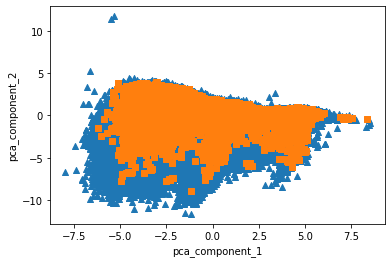

In [28]:
# ^ = 0 / s = 1
markers=['^', 's']

for i, marker in enumerate(markers):
    x_axis_data = train_encodedDF_pca[train_encodedDF_pca['isFraud'] == i]['pca_component_1']
    y_axis_data = train_encodedDF_pca[train_encodedDF_pca['isFraud'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)
    
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [23]:
# explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차이하는 변동성의 비율을 제공
print(pca.explained_variance_ratio_)

[0.20603219 0.09216066]


# 요약

In [ ]:
# PCA가 모델의 성능을 높여주는 것은 아니다. 하지만, 빠르게 필요 없는 feature들을 없애고 핵심적인 feature 들만을 뽑아서 모델을 만드는 것에는 유용